In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

wine = load_wine()
wine.data
wine.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [2]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size = 0.3)

clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("decision tree:{}".format(score_c)
     ,"random forest:{}".format(score_r)
     )

decision tree:0.9814814814814815 random forest:0.9814814814814815


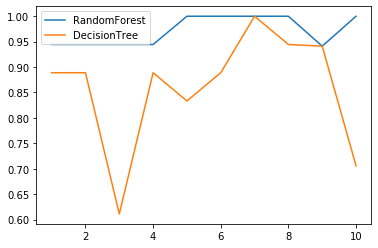

In [3]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "DecisionTree")
plt.legend()
plt.show()




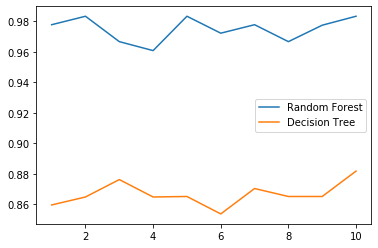

In [5]:
rfc_l = []
clf_l = []


for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv = 10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label ="Decision Tree")
plt.legend()
plt.show()


In [ ]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv = 10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [7]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)

rfc.estimators_[0].random_state
# for i in range(len(rfc.estimators_)):
#     print(rfc.estimators_[i].random_state)

1872583848

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = load_breast_cancer()
data

data.data.shape

# data.target




(569, 30)

In [11]:
rfc = RandomForestClassifier(n_estimators=100,random_state=50)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9666666666666668

0.968421052631579 71


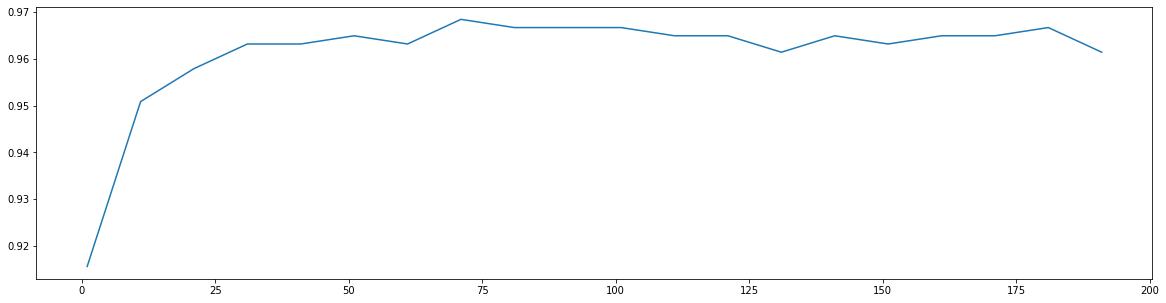

In [12]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1,
                                random_state=50)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.968421052631579 66


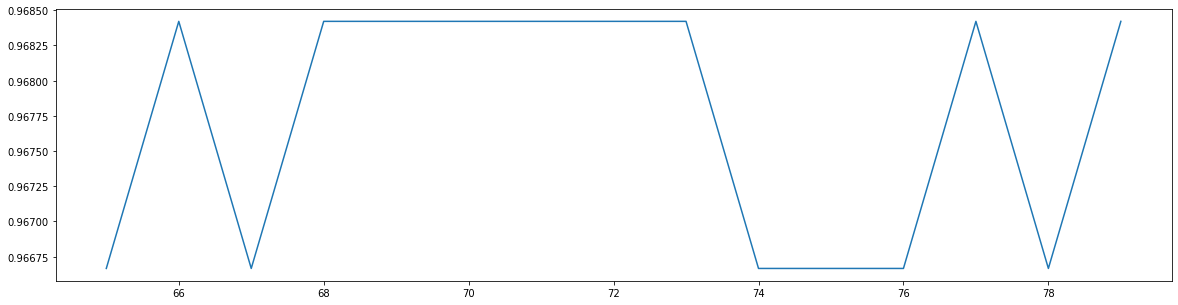

In [13]:
scorel = []
for i in range(65,80):
    rfc = RandomForestClassifier(n_estimators=i
                                ,n_jobs=-1,
                                random_state=50)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(65,80)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,80),scorel)
plt.show()

In [14]:
param_grid = {'max_depth':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=66
                            ,random_state=50)
GS = GridSearchCV(rfc,param_grid,cv =10)
GS.fit(data.data,data.target)

GS.best_params_

GS.best_score_

0.9701754385964911

In [17]:
param_grid = {'max_depth':np.arange(1,10,1)}
rfc = RandomForestClassifier(n_estimators=66
                            ,random_state=50)
GS = GridSearchCV(rfc,param_grid,cv =10)
GS.fit(data.data,data.target)

GS.best_params_

GS.best_score_

0.9701754385964911

In [22]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=66
                            ,random_state=50)
GS = GridSearchCV(rfc,param_grid,cv =10)
GS.fit(data.data,data.target)

GS.best_params_

GS.best_score_

0.9701754385964911

In [23]:
param_grid = {'min_samples_leaf':np.arange(1,1+20,1)}
rfc = RandomForestClassifier(n_estimators=66
                            ,random_state=50)
GS = GridSearchCV(rfc,param_grid,cv =10)
GS.fit(data.data,data.target)

GS.best_params_

GS.best_score_

0.968421052631579

In [26]:
param_grid = {'min_samples_split':np.arange(2,2+20,1)}
rfc = RandomForestClassifier(n_estimators=66
                            ,random_state=50)
GS = GridSearchCV(rfc,param_grid,cv =10)
GS.fit(data.data,data.target)

GS.best_params_

GS.best_score_

0.9701754385964912

In [27]:
param_grid = {'criterion':['gini','entropy']}
rfc = RandomForestClassifier(n_estimators=66
                            ,random_state=50)
GS = GridSearchCV(rfc,param_grid,cv =10)
GS.fit(data.data,data.target)

GS.best_params_

GS.best_score_

0.968421052631579

In [31]:
param_grid = {'min_samples_split':np.arange(2,2+20,1)}
rfc = RandomForestClassifier(n_estimators=66
                            ,random_state=50)
GS = GridSearchCV(rfc,param_grid,cv =10)
GS.fit(data.data,data.target)

GS.best_params_

score = GS.best_score_
score
# score-score_pre

0.9701754385964912